# Test graph-tool visual tool 
---

In [4]:
"""Import the right packages."""
import os
import sys

import graph_tool.all as gt
import numpy as np

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, "../../"))
# Import own module
sys.path.append(par_dir)
if True:
    from src.network_utils.network_converter import NetworkConverter
    from src.network_utils.network_reader import NetworkReader
    from src.simulators.sim_mart_vaq import SimMartVaq

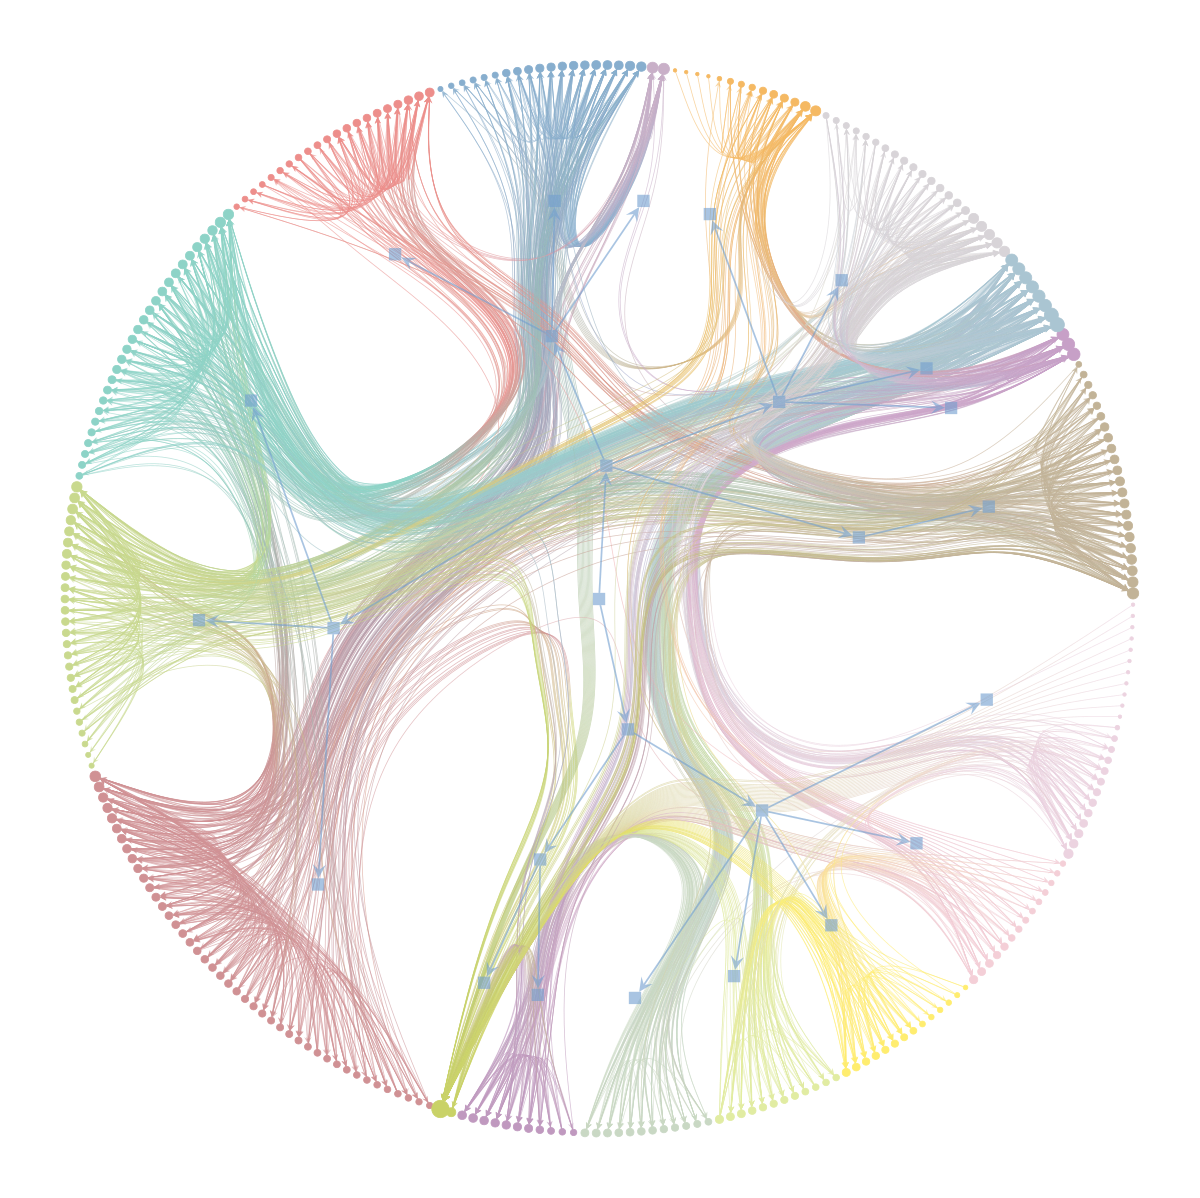

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f626c6ac6d0, at 0x7f6208a38c10>,
 <Graph object, directed, with 324 vertices and 323 edges, at 0x7f6208a272e0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f6208a272e0, at 0x7f6208a273a0>)

In [2]:
"""Test if resulting graph is shown to prove graph-tool is installed."""

g = gt.collection.data["celegansneural"]
state = gt.minimize_nested_blockmodel_dl(g)
state.draw()

---

Test if random paritions is working.

Thereby it is important to check that the nodes of the same partition do have a connection.

Using OverlapBlockState

group_numbers=frozenset({0, 1, 2, 3})
list(mbr_list)=[2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 2, 0, 3, 3, 3, 0, 2, 3, 3, 2, 3, 1, 3, 2, 3, 0, 1, 1, 1, 0, 3, 2, 2, 3, 3, 0, 3, 1, 2, 2, 0, 3, 0, 2, 0, 0, 0, 3, 1, 0, 1, 0, 2, 1, 0, 3, 3, 3, 2, 1, 1, 1, 0, 0, 3, 3, 1]
list(mbr_list_2[0][0])=[0, 1, 2, 3]


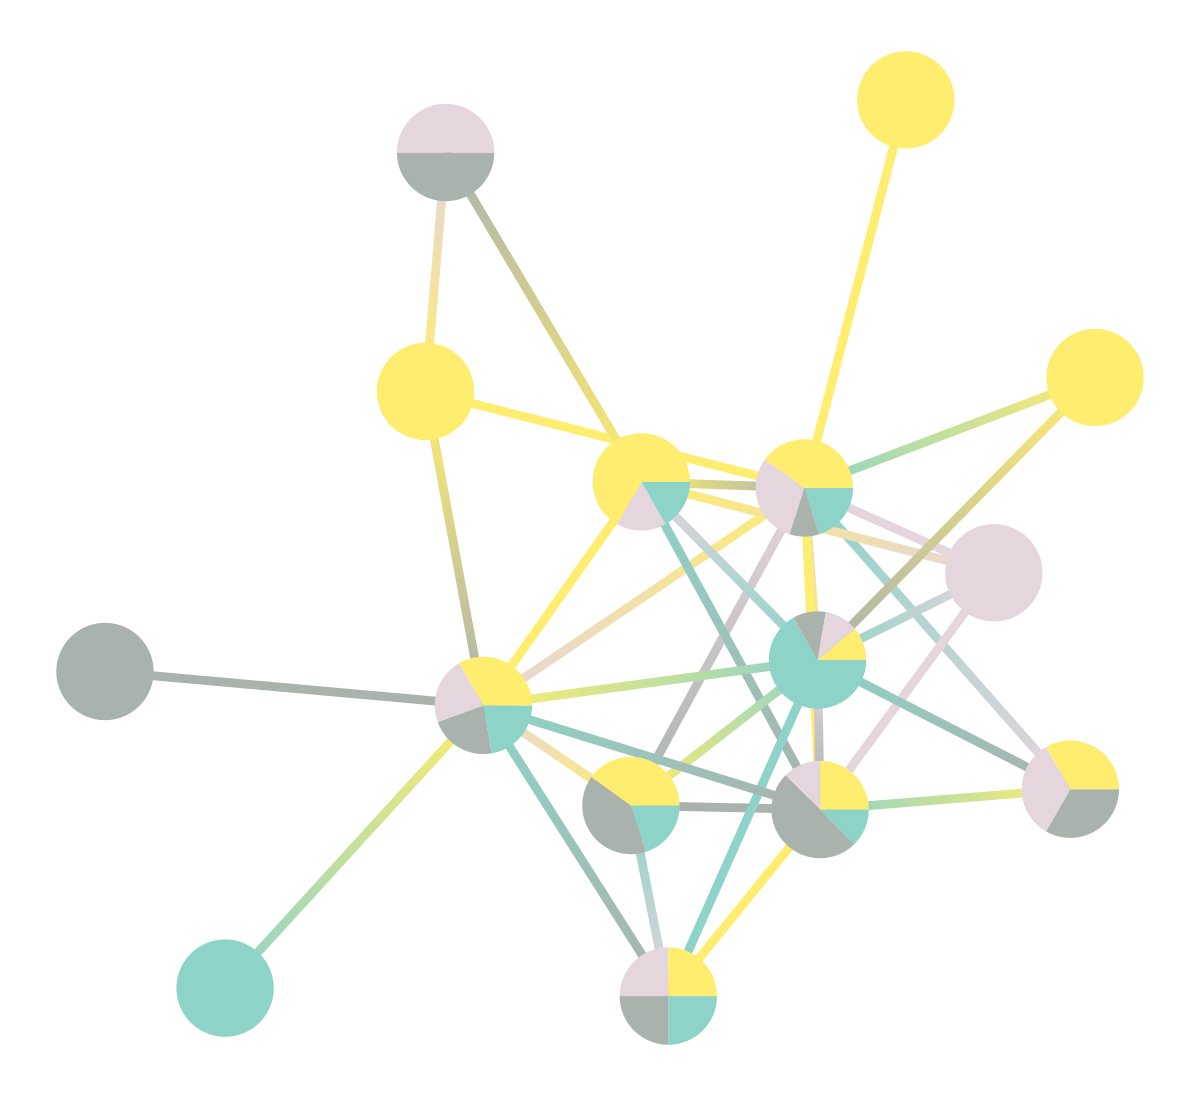

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f6208a4f9a0, at 0x7f6208a41340>

In [3]:
def sample_k(max):
    """Sample number of connections."""
    accept = False
    while not accept:
        k = np.random.randint(1, max + 1)
        accept = np.random.random() < 1.0 / k
    return k


g = gt.random_graph(15, lambda: sample_k(40), directed=False)

partitions = gt.OverlapBlockState(g, B=4)
mbr_list = partitions.get_blocks()
mbr_list_2 = partitions.get_overlap_blocks()
group_numbers = frozenset(mbr_list)
print(f"{group_numbers=}")
print(f"{list(mbr_list)=}")
print(f"{list(mbr_list_2[0][0])=}")
partitions.draw()

group_numbers=frozenset({0})


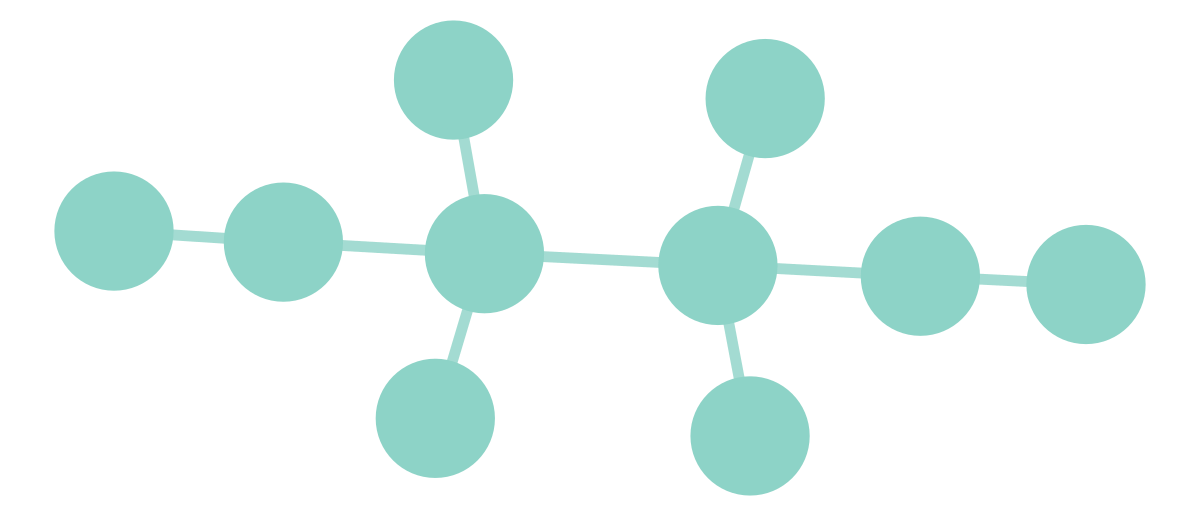

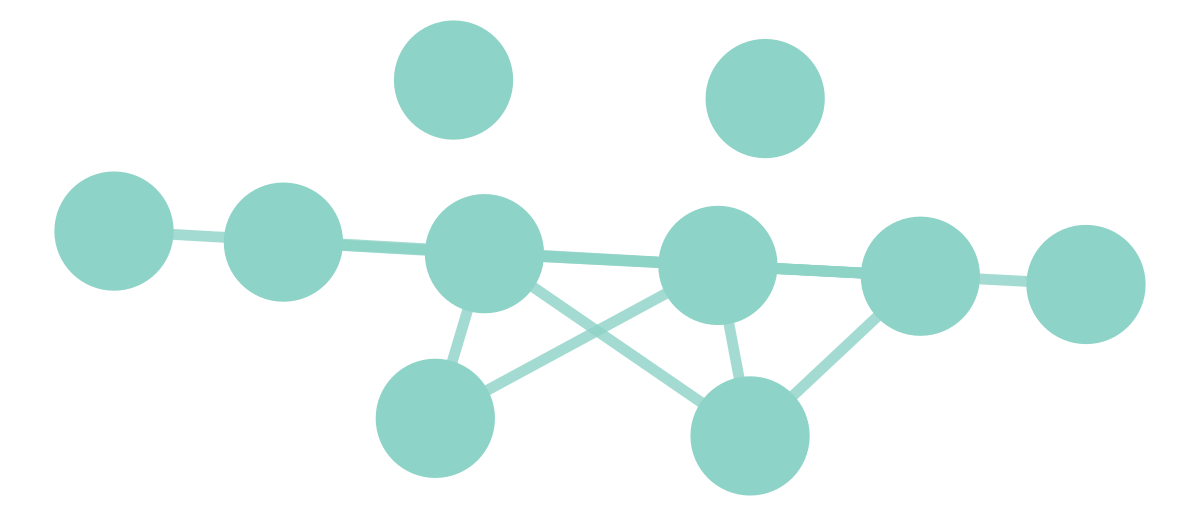

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f6206a50b20, at 0x7f6206a50370>

In [4]:
g = gt.price_network(10, m=1, directed=False)
pos = gt.sfdp_layout(g)

partitions = gt.minimize_blockmodel_dl(
    g, multilevel_mcmc_args={"B_min": 0.1 * g.num_vertices()}
)
mbr_list = partitions.get_blocks()
group_numbers = frozenset(mbr_list)
print(f"{group_numbers=}")
partitions.draw(pos=pos)

u = partitions.sample_graph(canonical=True, self_loops=False, multigraph=False)
ustate = gt.BlockState(u, b=partitions.b)
ustate.draw(pos=u.own_property(pos))

--- 
Verify the divide_network function visually

In [5]:
# Speed test
nx_network = NetworkReader().get_data("montagna_calls")
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(gt_network, ratio_honest=0.6, ratio_wolf=0.2)
simulators.network = simulators.initialise_network(simulators.network)

%timeit simulators.act_divide_in_groups_faster(simulators.network,min_grp=5,max_grp=10)
%timeit simulators.act_divide_in_groups(simulators.network,min_grp=5,max_grp=10)

Adding nodes to existing network using preferential attachment...: 100%|██████████| 380/380 [00:00<00:00, 6055.38it/s]
Adding attributes to nodes: 100%|██████████| 380/380 [00:00<00:00, 11609.43it/s]


11.2 ms ± 407 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


  1%|          | 4/475 [00:00<00:04, 111.49it/s]

57.7 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Adding nodes to existing network using preferential attachment...: 100%|██████████| 40/40 [00:00<00:00, 4409.26it/s]
Adding attributes to nodes: 100%|██████████| 40/40 [00:00<00:00, 10102.50it/s]
Some isolated components might be unassigned...


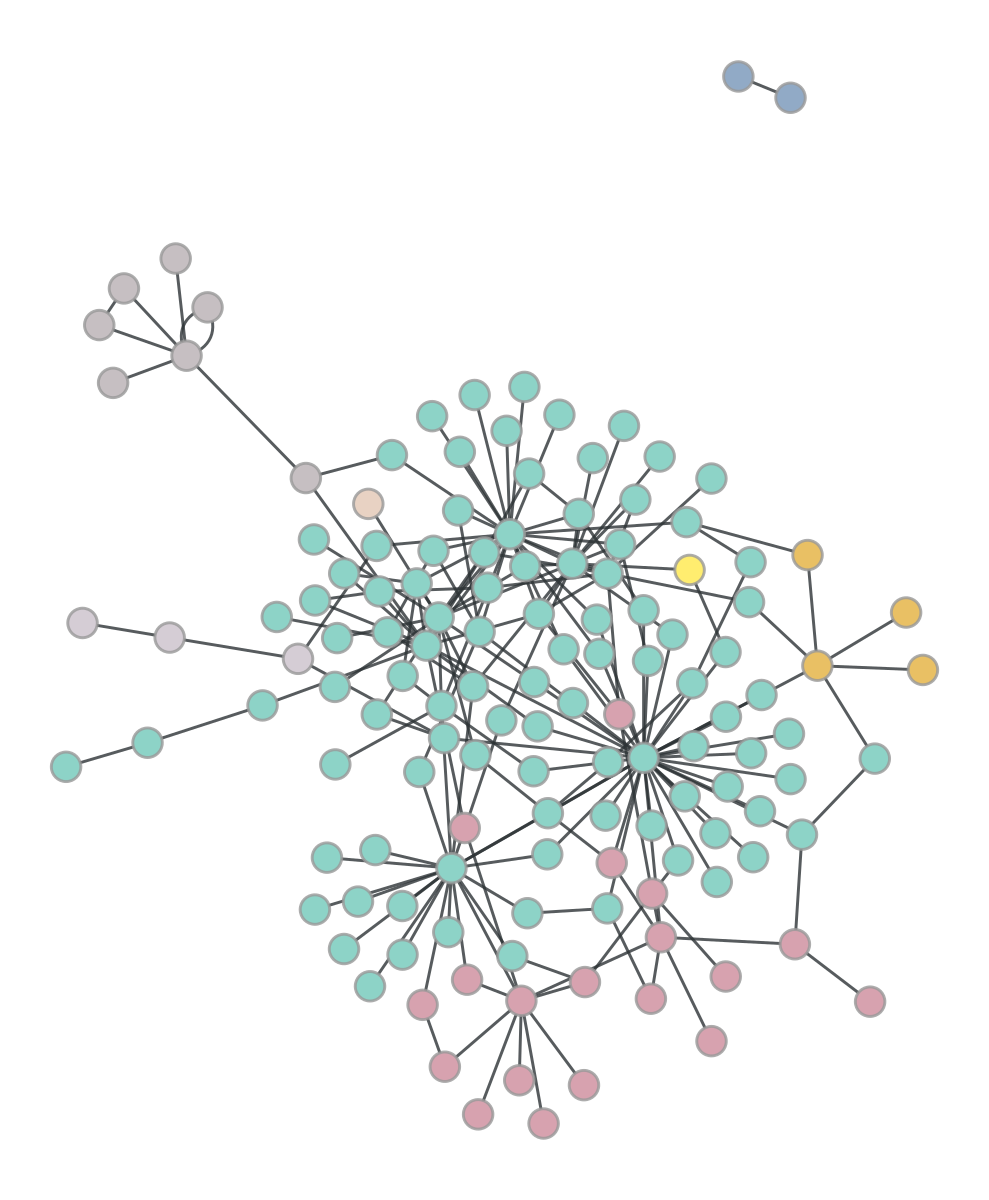

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f6208a4fbe0, at 0x7f61efc60df0>

In [8]:
nx_network = NetworkReader().get_data("montagna_calls")
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(gt_network, ratio_honest=0.2, ratio_wolf=0.1)
simulators.network = simulators.initialise_network(simulators.network)
divided_network, _ = simulators.act_divide_in_groups_faster(
    simulators.network, min_grp=5, max_grp=10
)
pos = gt.sfdp_layout(divided_network)
gt.graph_draw(divided_network, pos=pos, vertex_fill_color=divided_network.vp.grp_nbr)